In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

In [3]:

# Read the data from the specified Excel file
df = pd.read_excel('Fig4_data.xlsx')


In [4]:
# Extract relevant columns
cat_col = df.iloc[:, 33]
num_col = np.log10(df.iloc[:, 36])

# Create a new DataFrame for plotting
plot_df = pd.DataFrame({
    'Category': cat_col,
    'Numeric': num_col
})


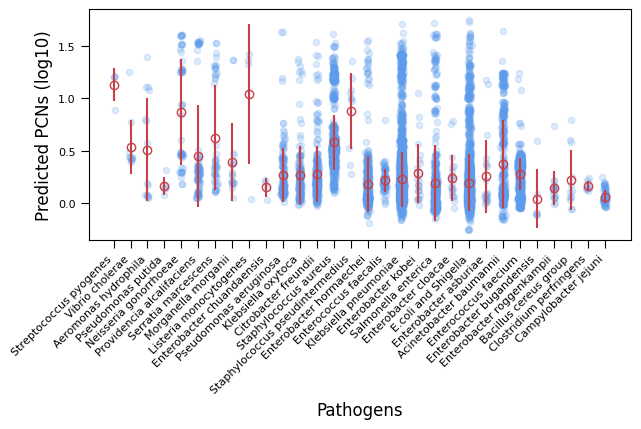

In [ ]:


# Plotting in order of the ARGs dosage
custom_order = [
    'Streptococcus pyogenes', 'Vibrio cholerae', 'Aeromonas hydrophila', 'Pseudomonas putida',
    'Neisseria gonorrhoeae', 'Providencia alcalifaciens', 'Serratia marcescens', 'Morganella morganii',
    'Listeria monocytogenes', 'Enterobacter chuandaensis', 'Pseudomonas aeruginosa', 'Klebsiella oxytoca',
    'Citrobacter freundii', 'Staphylococcus aureus', 'Staphylococcus pseudintermedius',
    'Enterobacter hormaechei', 'Enterococcus faecalis', 'Klebsiella pneumoniae',
    'Enterobacter kobei', 'Salmonella enterica', 'Enterobacter cloacae', 'E.coli and Shigella',
    'Enterobacter asburiae', 'Acinetobacter baumannii', 'Enterococcus faecium',
    'Enterobacter bugandensis', 'Enterobacter roggenkampii', 'Bacillus cereus group',
    'Clostridium perfringens', 'Campylobacter jejuni'
]

# Filter for categories with more than 3 data points
group_counts = plot_df.groupby('Category')['Numeric'].count()
valid_categories = group_counts[group_counts > 3].index
filtered_df = plot_df[plot_df['Category'].isin(valid_categories)]

# Ensure the custom order only includes valid categories
ordered_categories = [cat for cat in custom_order if cat in valid_categories]

# Group stats only for those in custom order
group_stats = filtered_df.groupby('Category')['Numeric'].agg(['mean', 'std'])
ordered_stats = group_stats.loc[ordered_categories]

# Begin plot
plt.figure(figsize=(7, 3))
x_pos = np.arange(len(ordered_categories))

# Plot mean ± std error bars
plt.errorbar(x_pos, ordered_stats['mean'], yerr=ordered_stats['std'],
             fmt='o', fillstyle='none', capsize=0, color='#C74049', label='Mean with Std Dev')

# Overlay individual data points with jitter
for i, category in enumerate(ordered_categories):
    cat_data = filtered_df[filtered_df['Category'] == category]['Numeric']
    x_jitter = np.random.normal(i, 0.05, len(cat_data))
    plt.scatter(x_jitter, cat_data, color='#5D9CEC', alpha=0.2, s=20)

# X-axis configuration
plt.xticks(x_pos, ordered_categories, fontsize=8, rotation=45, ha='right')
plt.yticks(fontsize=8)
plt.tick_params(axis='x', which='both', length=6)
plt.tick_params(axis='y', which='both', length=6)

# Labels
plt.xlabel('Pathogens', fontsize=12)
plt.ylabel('Predicted PCNs (log10)', fontsize=12)

# Save in multiple formats
plt.savefig('Visualization_4d1.pdf', bbox_inches='tight')
plt.show()
